In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

# seaborn:

You can use seaborn style to get grids like in lecture but i do not recommend them here because it will turn off all spines by default

In [2]:
# plt.style.use('seaborn')
# plt.style.available

Lets create two pandas series objects.

In [3]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

draw a histogram

<IPython.core.display.Javascript object>


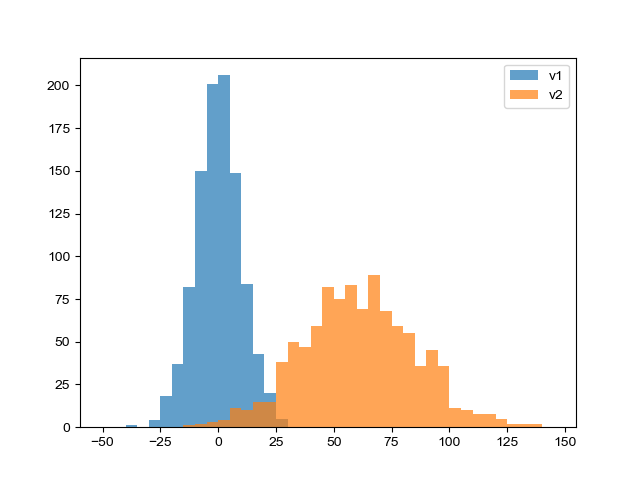

In [4]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

## kernel density estimation plot:

plot a kernel density estimation over a stacked barchart

<IPython.core.display.Javascript object>


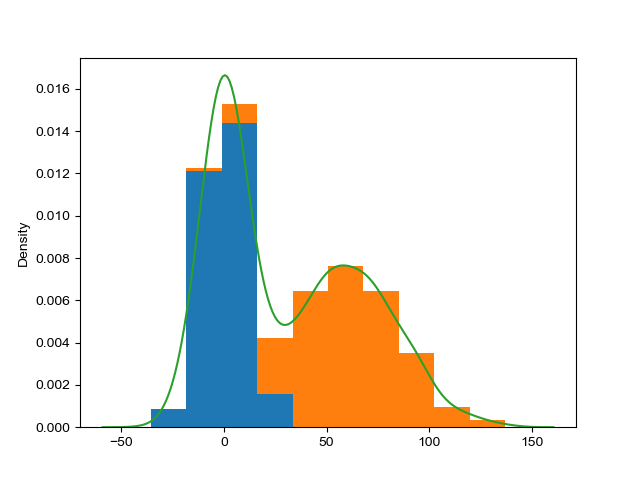

In [5]:
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2)) # concatinate adds v1 and v2 values so if we plot it will give same graph as stacked bar chart
sns.kdeplot(v3);

## distplot():

<IPython.core.display.Javascript object>


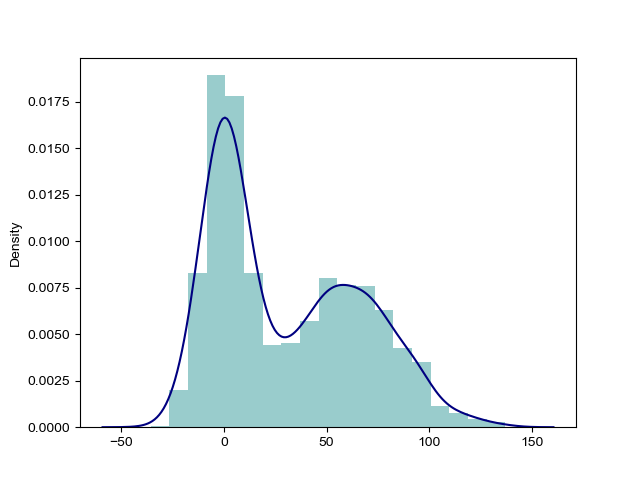

C:\Users\Ahmaf\.conda\envs\mypy3env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [6]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

## histplot()/kdeplot()
if you do not want to get warning use method below

<IPython.core.display.Javascript object>


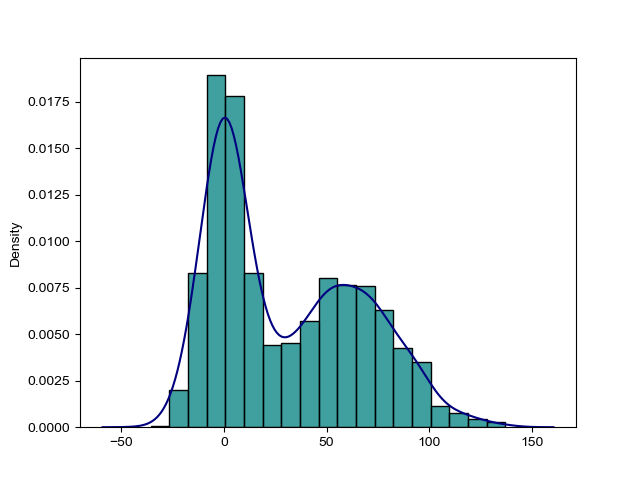

<AxesSubplot:ylabel='Density'>

In [7]:
plt.figure()
sns.histplot(v3, color='Teal', stat='density')
sns.kdeplot(v3, color='Navy')

## jointplot():
jointplot is same as grid we studied before remember jointplot return as grid object, above function returned axes subplots and there are some functions like displot that return figure object.

C:\Users\Ahmaf\.conda\envs\mypy3env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


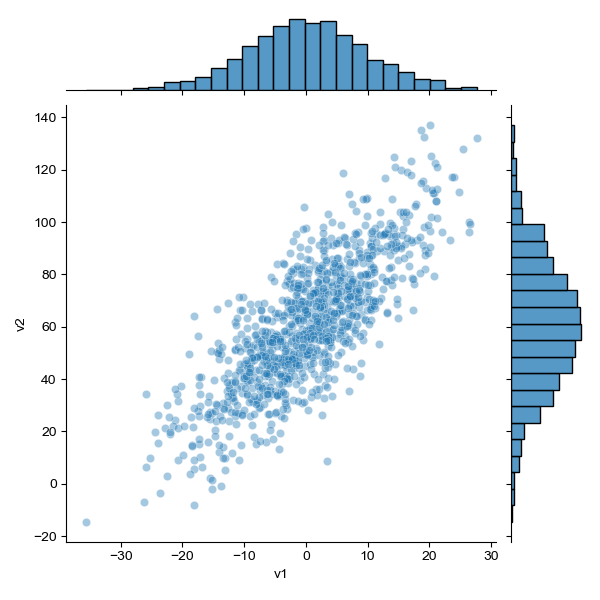

In [8]:
grid = sns.jointplot(v1, v2, alpha=0.4);

Lets remove the warning and set aspect ratio equal

<IPython.core.display.Javascript object>


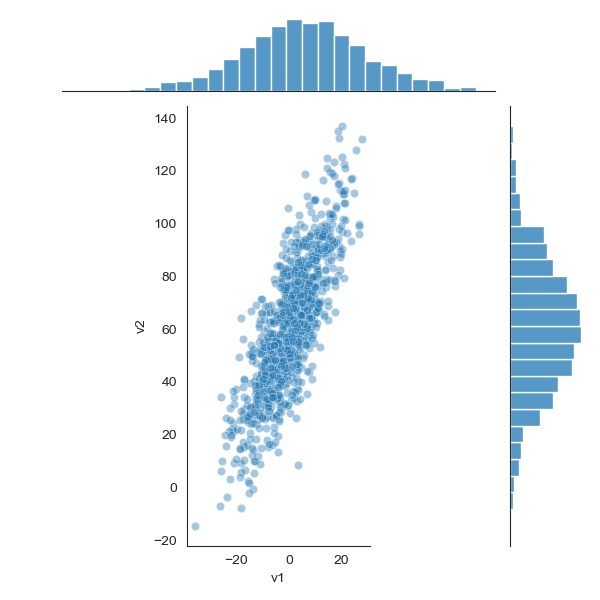

In [15]:
grid = sns.jointplot(x=v1, y=v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

### kind=hex:

<IPython.core.display.Javascript object>


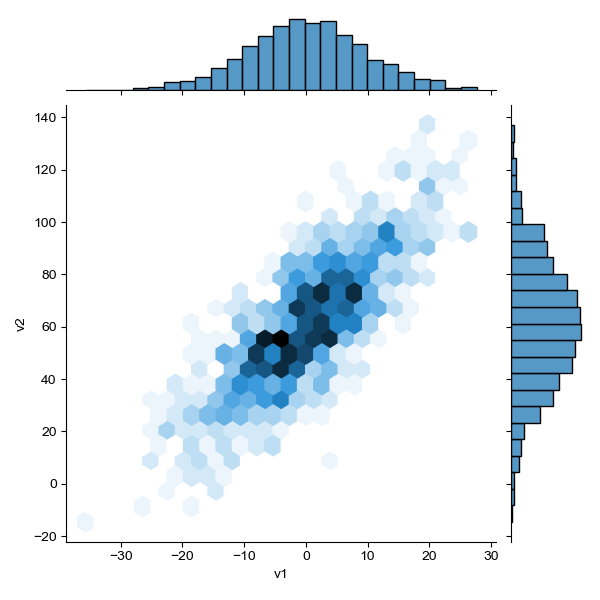

In [10]:
sns.jointplot(x=v1, y=v2, kind='hex');

### kind='kde':
lets put kind=kde and set space = 0 which put kdes on the top of spines and fill = True so that we get shade under the curve

<IPython.core.display.Javascript object>


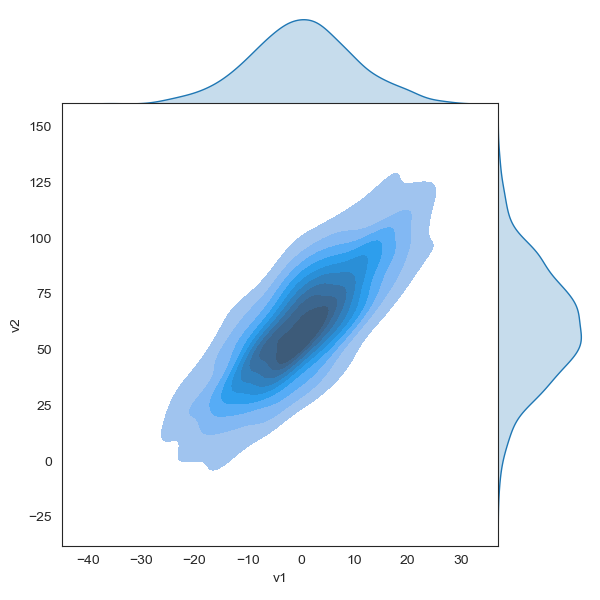

In [11]:
sns.set_style('white')

sns.jointplot(x=v1, y=v2, kind='kde', space=0,fill=True);

Lets explore some other usefull seaborn functions and load iris.csv file

In [12]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## pairplot():
pairplot() does the same work as scatter_matrix(), hue sets different colours wrt to values in iris['Name'], use height = 2 which is same as size = 2.

despine() removes the useless spines(top and right).

<IPython.core.display.Javascript object>


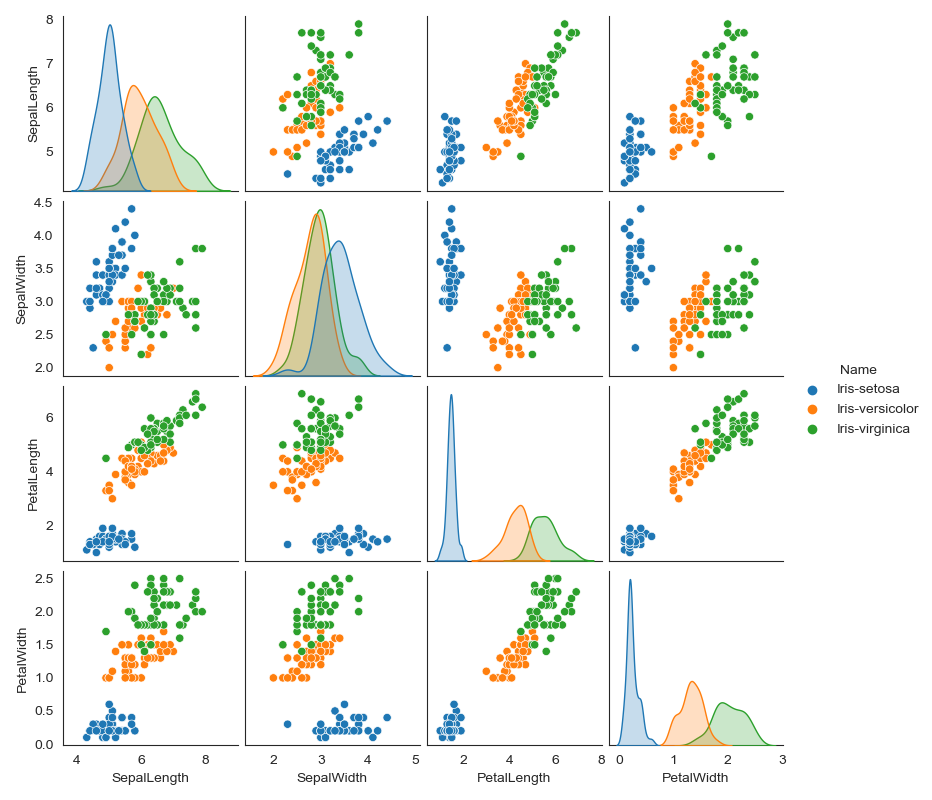

In [13]:
sns.pairplot(iris, hue='Name', diag_kind='kde', height=2)
sns.despine()

## swarmplot() and violinplot():
violinplot is an advanced version of boxplot but it uses kde on the probability density along the width, look at swarmplot it is creating a small histogram with wider the mini histogram bar higher the probability density at that value of petallenghth.(violinplot is just doiing the same with a kde chart insted).

<IPython.core.display.Javascript object>


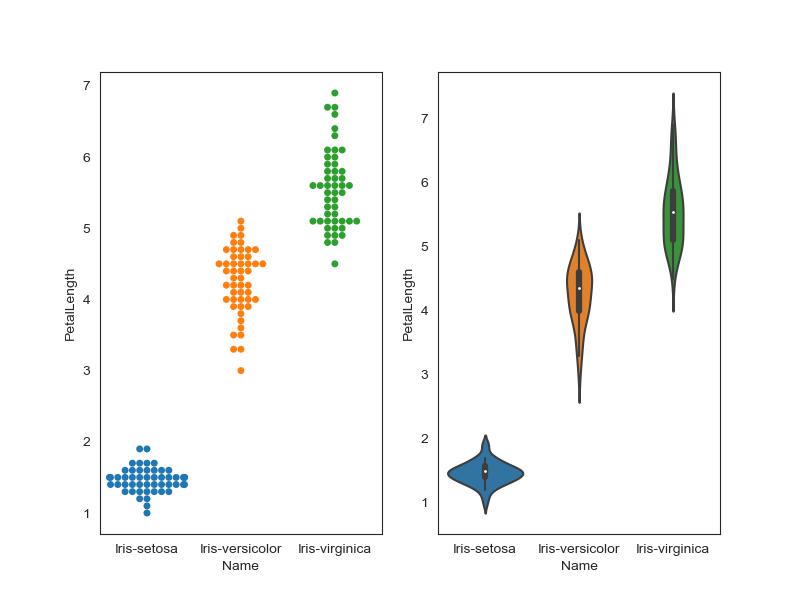

C:\Users\Ahmaf\.conda\envs\mypy3env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ahmaf\.conda\envs\mypy3env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ahmaf\.conda\envs\mypy3env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [14]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);